In [1]:
import scipy
import sympy as sp
import numpy as np
from SumOfSquares import SOSProblem, poly_opt_prob
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
def poly(coeff, x):
    try:
        l = len(coeff)
    except:
        l = coeff.size
    pol = 0
    for j in range(l):
        pol = pol + coeff[j] * x**j
    return pol

In [3]:
mat = scipy.io.loadmat('regression_data.mat')
xv = mat['xvec'][0]
fv = mat['fvec'][0]

In [5]:
c = cp.Variable(8)
p = [0 for i in range(20)]
for i in range(20):
    p[i] = (fv[i] - poly(c,xv[i]))**2

In [6]:
constraints = []
prob = cp.Problem(cp.Minimize(cp.sum(p)), constraints)
prob.solve()

125.03257002750252

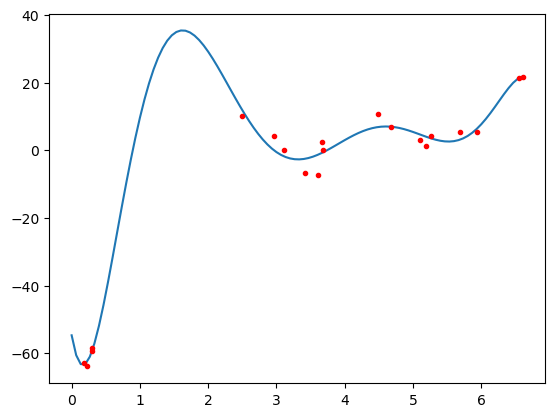

In [7]:
x = np.linspace(0, 6.6, 100)
plt.plot(x, poly(c.value, x))
plt.plot(xv, fv, 'ro', markersize = 3)
plt.show()

In [3]:
x = sp.symbols('x')
con = sp.symbols('c0:8')
for i in range(2,8):
    q = q + i * con[i] * x**(i-1)
sosprob = SOSProblem()
co = [0 for i in range(8)]
for i in range(8):
    co[i] = sosprob.sym_to_var(con[i])
sosprob.add_sos_constraint(q, [x])
expr = 0
for i in range(20):    
    expr = expr + (fv[i] - poly(con,xv[i]))**2
sosprob.set_objective('min', expr)
sosprob.solve()

NameError: name 'q' is not defined

In [4]:
x = sp.symbols('x')
con = sp.symbols('c0:8')
sosprob = SOSProblem()
y = sosprob.sym_to_var(x)
c = [sosprob.sym_to_var(con[i]) for i in range(8)]
p = con @ np.array([x**i for i in range(8)]).T
sosprob.add_sos_constraint(sp.diff(p,x), [x])
expr = sum([(fv[i]-poly(c,xv[i]))**2 for i in range(20)])
sosprob.set_objective('min', expr)

In [5]:
sosprob.solve()

ValueError: math domain error

In [48]:
x = sp.symbols('x')
con = sp.symbols('c0:8')
y = sosprob.sym_to_var(x)
c = [sosprob.sym_to_var(con[i]) for i in range(8)]
poly(c,xv[0])

<1×1 Real Linear Expression: c0 + c1·6.60428 + c2·43.6166 + c3·288.056 + c4·1902.41 + c5·12564 + c6·82976.4 + c7·548000>

In [46]:
x = sp.symbols('x')
con = sp.symbols('c0:8')
sosprob = SOSProblem()
co = [0 for i in range(8)]
for i in range(8):
    co[i] = sosprob.sym_to_var(con[i])
sosprob.sym_to_var(con[2]*(x**3))
#(con[2]*(x**3))
# for i in range(3,8):
#     q = q + i * co[i] * (y**(i-1))
# sosprob.add_sos_constraint(q, [x])
# expr = 0
# for i in range(20):    
#     expr = expr + (fv[i] - poly(co,xv[i]))**2
# sosprob.set_objective('min', expr)
# sosprob.solve()

<1×1 Real Variable: c2*x**3>